<a href="https://colab.research.google.com/github/ismaelgtzp88/AI_2024_IB/blob/main/FinalProyect_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [ ]:
# General Libraries
import pandas as pd                    # Data manipulation and analysis library
import numpy as np                     # Numerical computing library
import keras                           # High-level neural networks API
import warnings                        # Control over warnings emitted by Python
import matplotlib.pyplot as plt        # Plotting library
import seaborn as sns                  # Data visualization library based on matplotlib
import random                          # Generate pseudo-random numbers
import time                            # Time-related functions

# Path Process
import os                              # Operating system interfaces
import os.path                         # Common pathname manipulations
from pathlib import Path               # Object-oriented filesystem paths
import glob                            # Unix style pathname pattern expansion
from scipy.io import loadmat           # Read .mat files
import nibabel as nib                  # Access a wide range of neuroimaging file formats
import csv                             # CSV file reading and writing

# Image Process
import cv2                             # OpenCV library for computer vision tasks
from PIL import Image                  # Python Imaging Library for opening, manipulating, and saving many different image file formats
from keras.preprocessing import image  # Image preprocessing utilities
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generate batches of tensor image data with real-time data augmentation
from keras.models import Sequential    # Sequential model API
from keras.layers import Dense, Dropout, Flatten  # Dense and Dropout layers for neural networks
from keras.layers import Conv2D, MaxPooling2D      # Convolutional and pooling layers for 2D images
from keras.applications.vgg16 import preprocess_input, decode_predictions  # Preprocessing functions for VGG16 model
from skimage.feature import hessian_matrix, hessian_matrix_eigvals           # Functions for computing Hessian matrix
from scipy.ndimage.filters import convolve                                  # Multi-dimensional image processing functions
from skimage import data, io, filters                                       # Image processing functions from scikit-image
import skimage                        # Image processing library
from skimage.morphology import convex_hull_image, erosion                    # Morphological operations on binary images
from IPython import display          # Interactive computing in Python

from scipy.ndimage import gaussian_filter  # Multidimensional Gaussian filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # Plotting 3D collections
import matplotlib.patches as patches                   # Functions for creating patch objects

# Scaler, Transformation and Accuracy Control
from sklearn.preprocessing import StandardScaler     # Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score  # Model evaluation metrics
from sklearn.preprocessing import MinMaxScaler       # Scale features to a range
from keras.utils import to_categorical               # Convert class vector to binary class matrix
import tensorflow as tf                              # TensorFlow machine learning library
from keras import backend as K                        # Keras backend module
from keras.utils import plot_model                   # Plot model architecture as a graph
from keras import regularizers                        # Regularization techniques for neural networks
from keras.optimizers import RMSprop, Adam, SGD, Adamax      # Optimizers for training neural networks
from tensorflow.keras.models import Sequential, Model  # Sequential and Functional API for building models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, BatchNormalization, Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D, Reshape, Conv2DTranspose, LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate  # Layers for building neural networks
from tensorflow.keras.applications import VGG19, VGG19, inception_v3  # Pretrained models available in Keras
from tensorflow.keras.optimizers import Adam         # Adam optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Loss function for multi-class classification problems
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping  # Callbacks for training neural networks
import sklearn.metrics as metrics                    # Metrics for evaluating model performance
from keras.callbacks import LearningRateScheduler    # Callback to schedule learning rate changes during training
!pip install visualkeras
import visualkeras         #To visualize our CNNs

# IGNORING WARNINGS
from warnings import filterwarnings                # Filter warnings module
filterwarnings("ignore", category=DeprecationWarning)  # Ignore deprecation warnings
filterwarnings("ignore", category=FutureWarning)        # Ignore future warnings
filterwarnings("ignore", category=UserWarning)          # Ignore user warnings

2024-05-25 08:31:45.854270: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 08:31:45.854364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 08:31:45.988957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_25/2661235081.py:30: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve                                  # Multi-dimensional image processing functions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 27.5 MB/s eta 0:00:00


# **First model**
This model is going to predicate the clasification of the image

# **Import data. First model**

In [ ]:
# Defining paths to different categories of images
mild_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
moderate_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
non_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented'
very_mild_demented_path = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented'

# Lists to store file paths and corresponding labels
filepaths = []  # List to store file paths
labels = []  # List to store labels

# List of paths and corresponding labels
path_label_dict_list = [mild_demented_path, moderate_demented_path, non_demented_path, very_mild_demented_path]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']

# Looping through each category and extracting file paths and labels
for i, path in enumerate(path_label_dict_list):
    file_list = os.listdir(path)  # List of files in the directory
    for file in file_list:
        file_path = os.path.join(path, file)  # Full path of the file
        filepaths.append(file_path)  # Appending file path to the list
        labels.append(class_labels[i])  # Appending corresponding label to the list

# Creating Pandas Series for file paths and labels
filepaths_series = pd.Series(filepaths, name="filepaths")  # Series for file paths
labels_series = pd.Series(labels, name="labels")  # Series for labels

# Concatenating file paths and labels into a DataFrame
alzheimer_data = pd.concat([filepaths_series, labels_series], axis=1)  # Concatenating series into DataFrame
alzheimer_df = pd.DataFrame(alzheimer_data)  # Creating DataFrame from the concatenated data

# Print the first few rows of the Alzheimer_df DataFrame
print(alzheimer_df.head())
# Print the count of each unique value in the "labels" column of the Alzheimer_df DataFrame
print(alzheimer_df["labels"].value_counts())

                                           filepaths         labels
0  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
1  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
2  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
3  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
4  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
labels
Non Demented          9600
Mild Demented         8960
Very Mild Demented    8960
Moderate Demented     6464
Name: count, dtype: int64


In [ ]:
# Split the Alzheimer_df dataset into train and test sets with a test size of 20% and a fixed random state for reproducibility
train_images, test_images = train_test_split(alzheimer_df, test_size=0.3, random_state=42)

# Further split the Alzheimer_df dataset into train and validation sets with a test size of 20% and the same random state as before
train_set, val_set = train_test_split(alzheimer_df, test_size=0.2, random_state=42)

# Print the shape of the training set
print("Shape of the training set:", train_set.shape)

# Print the shape of the test images
print("Shape of the test images:", test_images.shape)

# Print the shape of the validation set
print("Shape of the validation set:", val_set.shape)

# Print the shape of the training images
print("Shape of the training images:", train_images.shape)


Shape of the training set: (27187, 2)
Shape of the test images: (10196, 2)
Shape of the validation set: (6797, 2)
Shape of the training images: (23788, 2)


In [ ]:
# Initialize an ImageDataGenerator with preprocessing function for MobileNetV2
image_data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

# Generate train data flow from DataFrame
train_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Generate test data flow from DataFrame
test_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Generate validation data flow from DataFrame
validation_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)


Found 27187 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 6797 validated image filenames belonging to 4 classes.


# **Visualizes data. First Model**

In [ ]:
classes=list(train_data_flow.class_indices.keys())
print (classes)

['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']


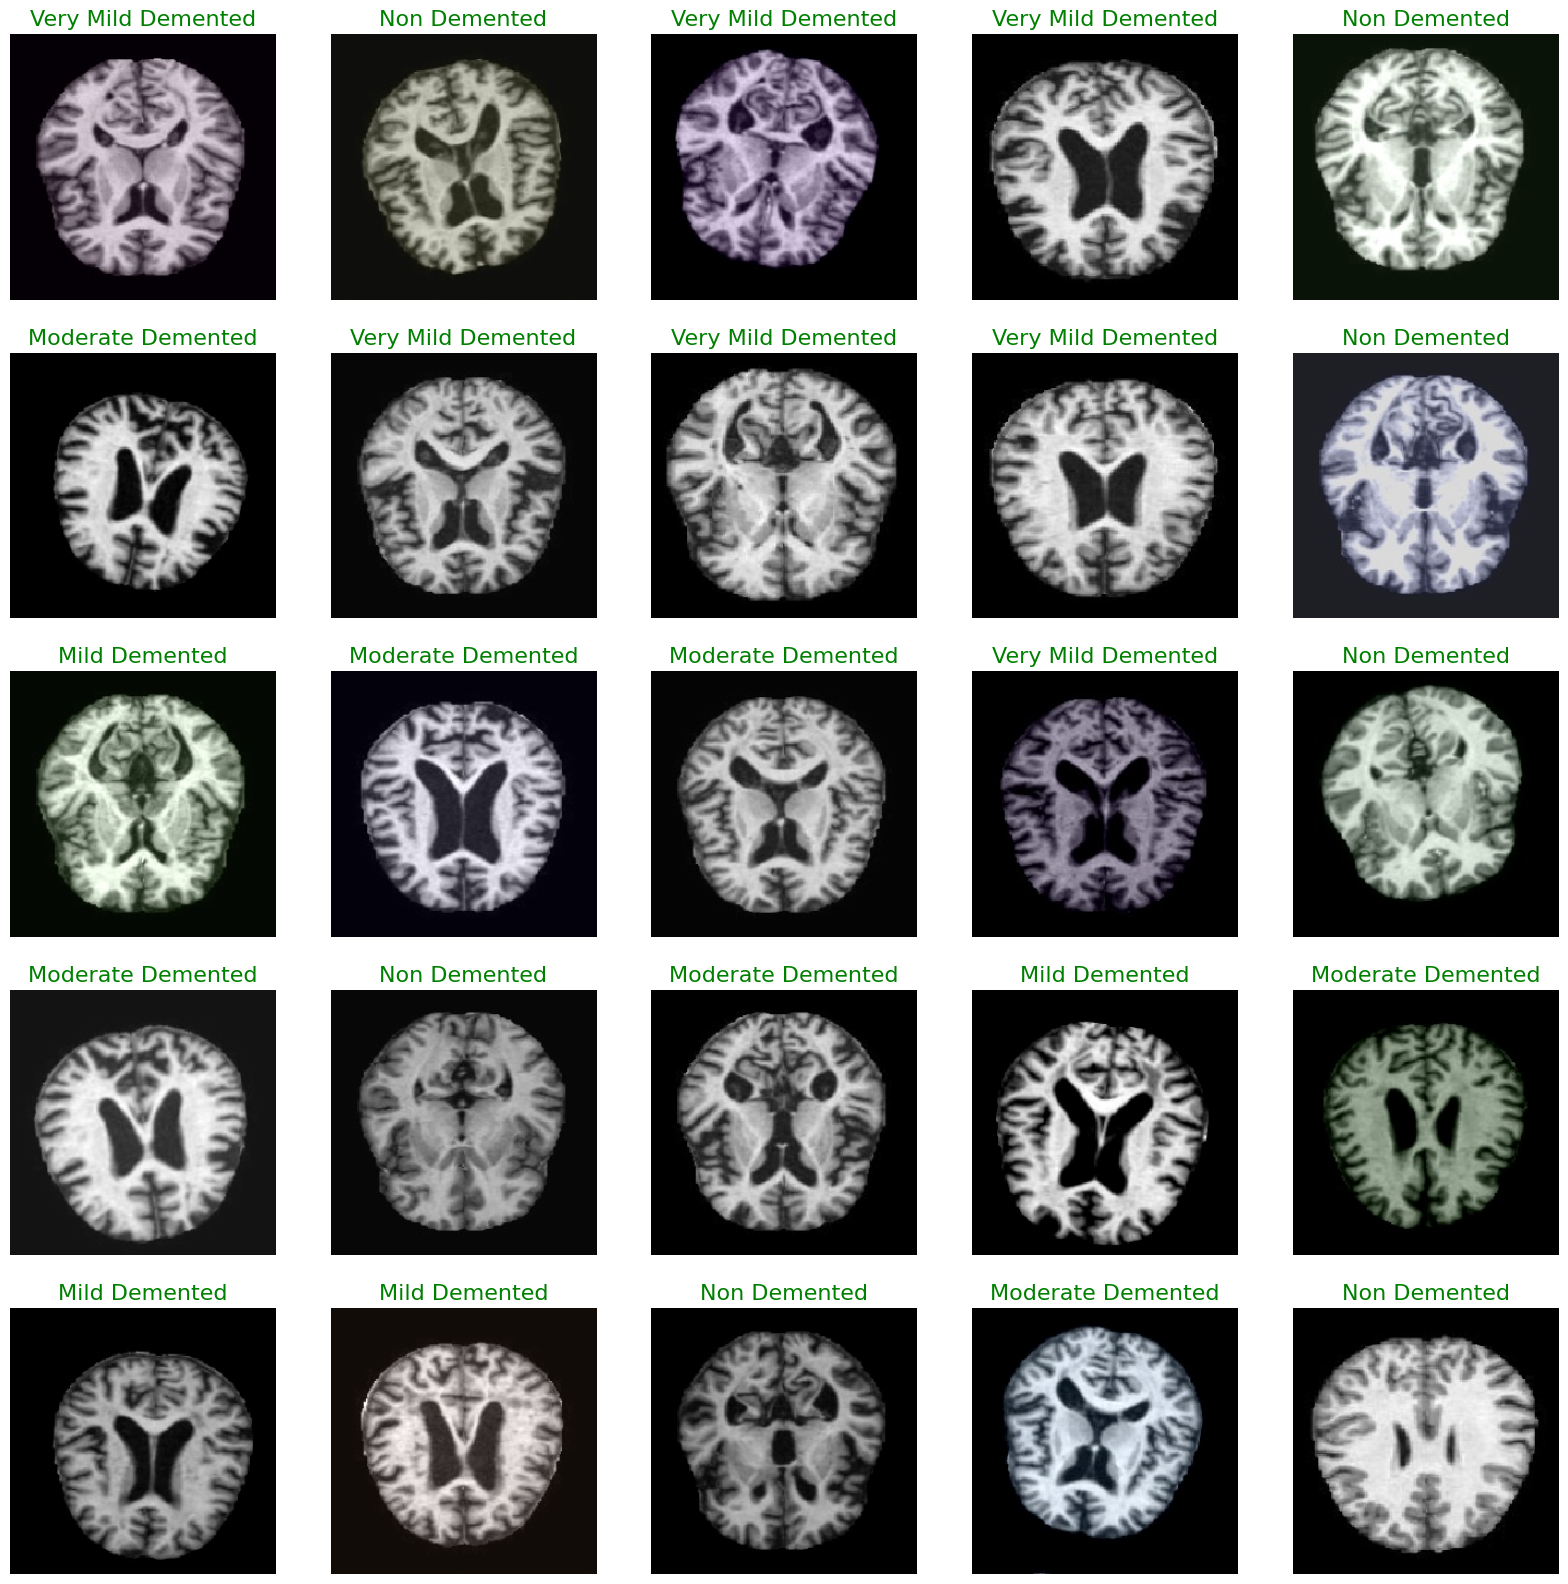

In [ ]:
def display_sample_images(image):
    # Extract class indices from the test set
    class_dict = test_data_flow.class_indices
    # Get the list of class names
    classes = list(class_dict.keys())
    # Get a batch of images and their labels from the generator
    images, labels = next(image)

    # Set up the plot for displaying images
    plt.figure(figsize=(20, 20))
    length = len(labels)

    # Determine the number of images to display, maximum 25
    if length < 25:
        num_images = length
    else:
        num_images = 25

    # Iterate through the images and display them
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        # Scale images between 0 and 1
        image = (images[i] + 1) / 2
        plt.imshow(image)
        # Get the index of the predicted class
        index = np.argmax(labels[i])
        # Get the class name corresponding to the index
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')

    # Show the plot with the images
    plt.show()

#Call the function
display_sample_images(train_data_flow)

# **Create Architecture. First Model**

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

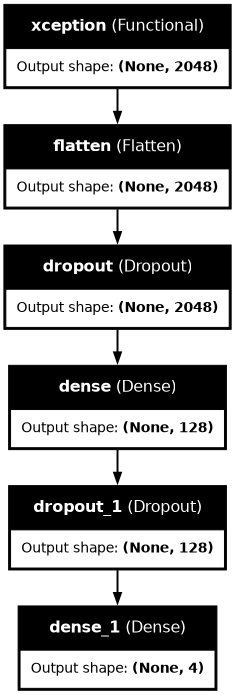

In [ ]:
# Defining the shape of the input images
image_shape = (244, 244, 3)

# Loading the pre-trained Xception model from Keras applications
base_model = tf.keras.applications.Xception(
    include_top=False,  # Excludes the top (final) layer of the model
    weights="imagenet",  # Initializes the model with pre-trained ImageNet weights
    input_shape=image_shape,  # Shape of input images expected by the model
    pooling='max'  # Global max pooling operation for feature extraction
)

# Creating a Sequential model by stacking layers
ModelDiagnostic = Sequential([
    base_model,  # Adding the Xception base model
    Flatten(),  # Flattening the output tensor from the base model
    Dropout(rate=0.3),  # Regularization by randomly setting input units to 0 with a frequency of 0.3
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(rate=0.25),  # Regularization by randomly setting input units to 0 with a frequency of 0.25
    Dense(4, activation='softmax')  # Output layer with 4 neurons for classification using softmax activation
])

# Compiling the model with Adamax optimizer, categorical crossentropy loss, and accuracy metric
ModelDiagnostic.compile(
    optimizer=Adamax(learning_rate=0.001),  # Optimizer with a specific learning rate
    loss='categorical_crossentropy',  # Loss function for categorical classification
    metrics=['accuracy']  # Evaluation metric to monitor during training
)

# Printing the summary of the model architecture
ModelDiagnostic.summary()

# Building the model with a specified input shape
ModelDiagnostic.build(input_shape=(None, *image_shape))

# Plotting the model architecture0
tf.keras.utils.plot_model(
    ModelDiagnostic,
    show_shapes=True,  # Displaying shapes of input/output tensors in the plot
    show_dtype=False,  # Hiding data types of tensors in the plot
    show_layer_names=True,  # Displaying names of layers in the plot
    rankdir='TB',  # Orientation of the plot (Top to Bottom)
    expand_nested=False,  # Flattening nested models for visualization
    dpi=70  # Dots per inch for the plot
)



# **Training. First Model**

In [ ]:
# Training the model using the training data for 10 epochs and validating it after each epoch using the validation data.
# Saving the training history for analysis and monitoring.
training_history = ModelDiagnostic.fit(train_data_flow, epochs=5, validation_data=validation_data_flow, validation_freq=1)

Epoch 1/5


I0000 00:00:1716626294.033940      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716626294.108358      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


674/850 ━━━━━━━━━━━━━━━━━━━━ 1:30 517ms/step - accuracy: 0.5949 - loss: 0.8789

W0000 00:00:1716626688.790344      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.6308 - loss: 0.8054

W0000 00:00:1716626784.050896      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 639s 652ms/step - accuracy: 0.6310 - loss: 0.8050 - val_accuracy: 0.9500 - val_loss: 0.1318
Epoch 2/5


W0000 00:00:1716626848.147080      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


850/850 ━━━━━━━━━━━━━━━━━━━━ 472s 555ms/step - accuracy: 0.9649 - loss: 0.1032 - val_accuracy: 0.9634 - val_loss: 0.0994
Epoch 3/5
850/850 ━━━━━━━━━━━━━━━━━━━━ 472s 555ms/step - accuracy: 0.9885 - loss: 0.0336 - val_accuracy: 0.9595 - val_loss: 0.1342
Epoch 4/5
850/850 ━━━━━━━━━━━━━━━━━━━━ 471s 554ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9685 - val_loss: 0.0876
Epoch 5/5
850/850 ━━━━━━━━━━━━━━━━━━━━ 472s 554ms/step - accuracy: 0.9926 - loss: 0.0201 - val_accuracy: 0.9904 - val_loss: 0.0315


In [ ]:
# Train the model with the given training data
training_history1 = ModelDiagnostic.fit(
    train_data_flow,        # The training data provided in a flow format
    epochs=1,               # Number of epochs (iterations over the entire dataset) to train the model
    validation_data=validation_data_flow,  # The validation data provided in a flow format
    validation_freq=1       # Frequency at which the model is evaluated on the validation data (after every epoch)
)


850/850 ━━━━━━━━━━━━━━━━━━━━ 472s 555ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9876 - val_loss: 0.0459


In [ ]:
# Evaluate the model's performance on the test data and print detailed results
ModelDiagnostic.evaluate(test_data_flow, verbose=1)

319/319 ━━━━━━━━━━━━━━━━━━━━ 56s 176ms/step - accuracy: 0.9889 - loss: 0.0393


W0000 00:00:1716629265.776995      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.03476973623037338, 0.9903883934020996]

# **Results. First Model**

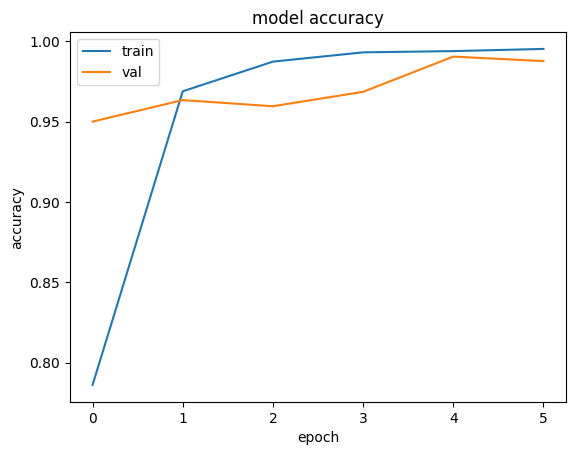

In [ ]:
plt.plot(training_history.history['accuracy'] + training_history1.history['accuracy'])
plt.plot(training_history.history['val_accuracy'] + training_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

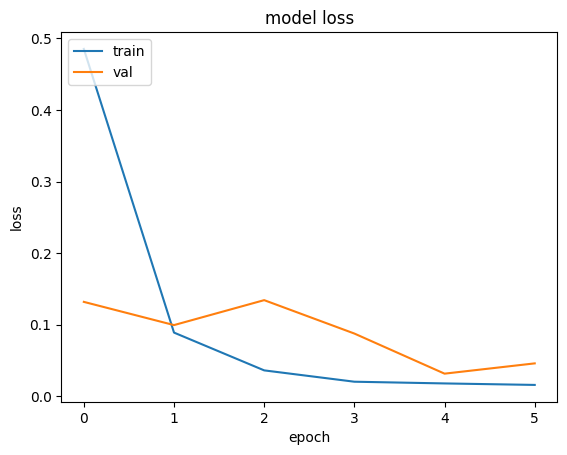

In [ ]:
plt.plot(training_history.history['loss'] + training_history1.history['loss'])
plt.plot(training_history.history['val_loss'] + training_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = ModelDiagnostic.predict(test_data_flow)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train_data_flow.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

  2/319 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step

W0000 00:00:1716629274.048990      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


319/319 ━━━━━━━━━━━━━━━━━━━━ 50s 146ms/step


W0000 00:00:1716629320.335886      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


                    precision    recall  f1-score   support

     Mild Demented       1.00      0.99      1.00      2693
 Moderate Demented       1.00      1.00      1.00      1977
      Non Demented       0.98      0.99      0.99      2811
Very Mild Demented       0.99      0.98      0.98      2715

          accuracy                           0.99     10196
         macro avg       0.99      0.99      0.99     10196
      weighted avg       0.99      0.99      0.99     10196

Accuracy of the Model: 99.0%


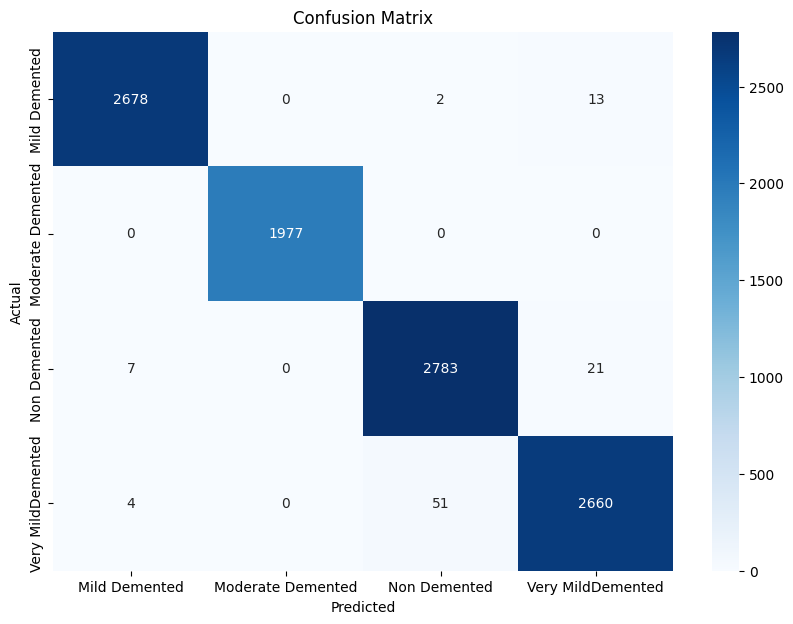

In [ ]:
# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

# **Prediction. First Model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


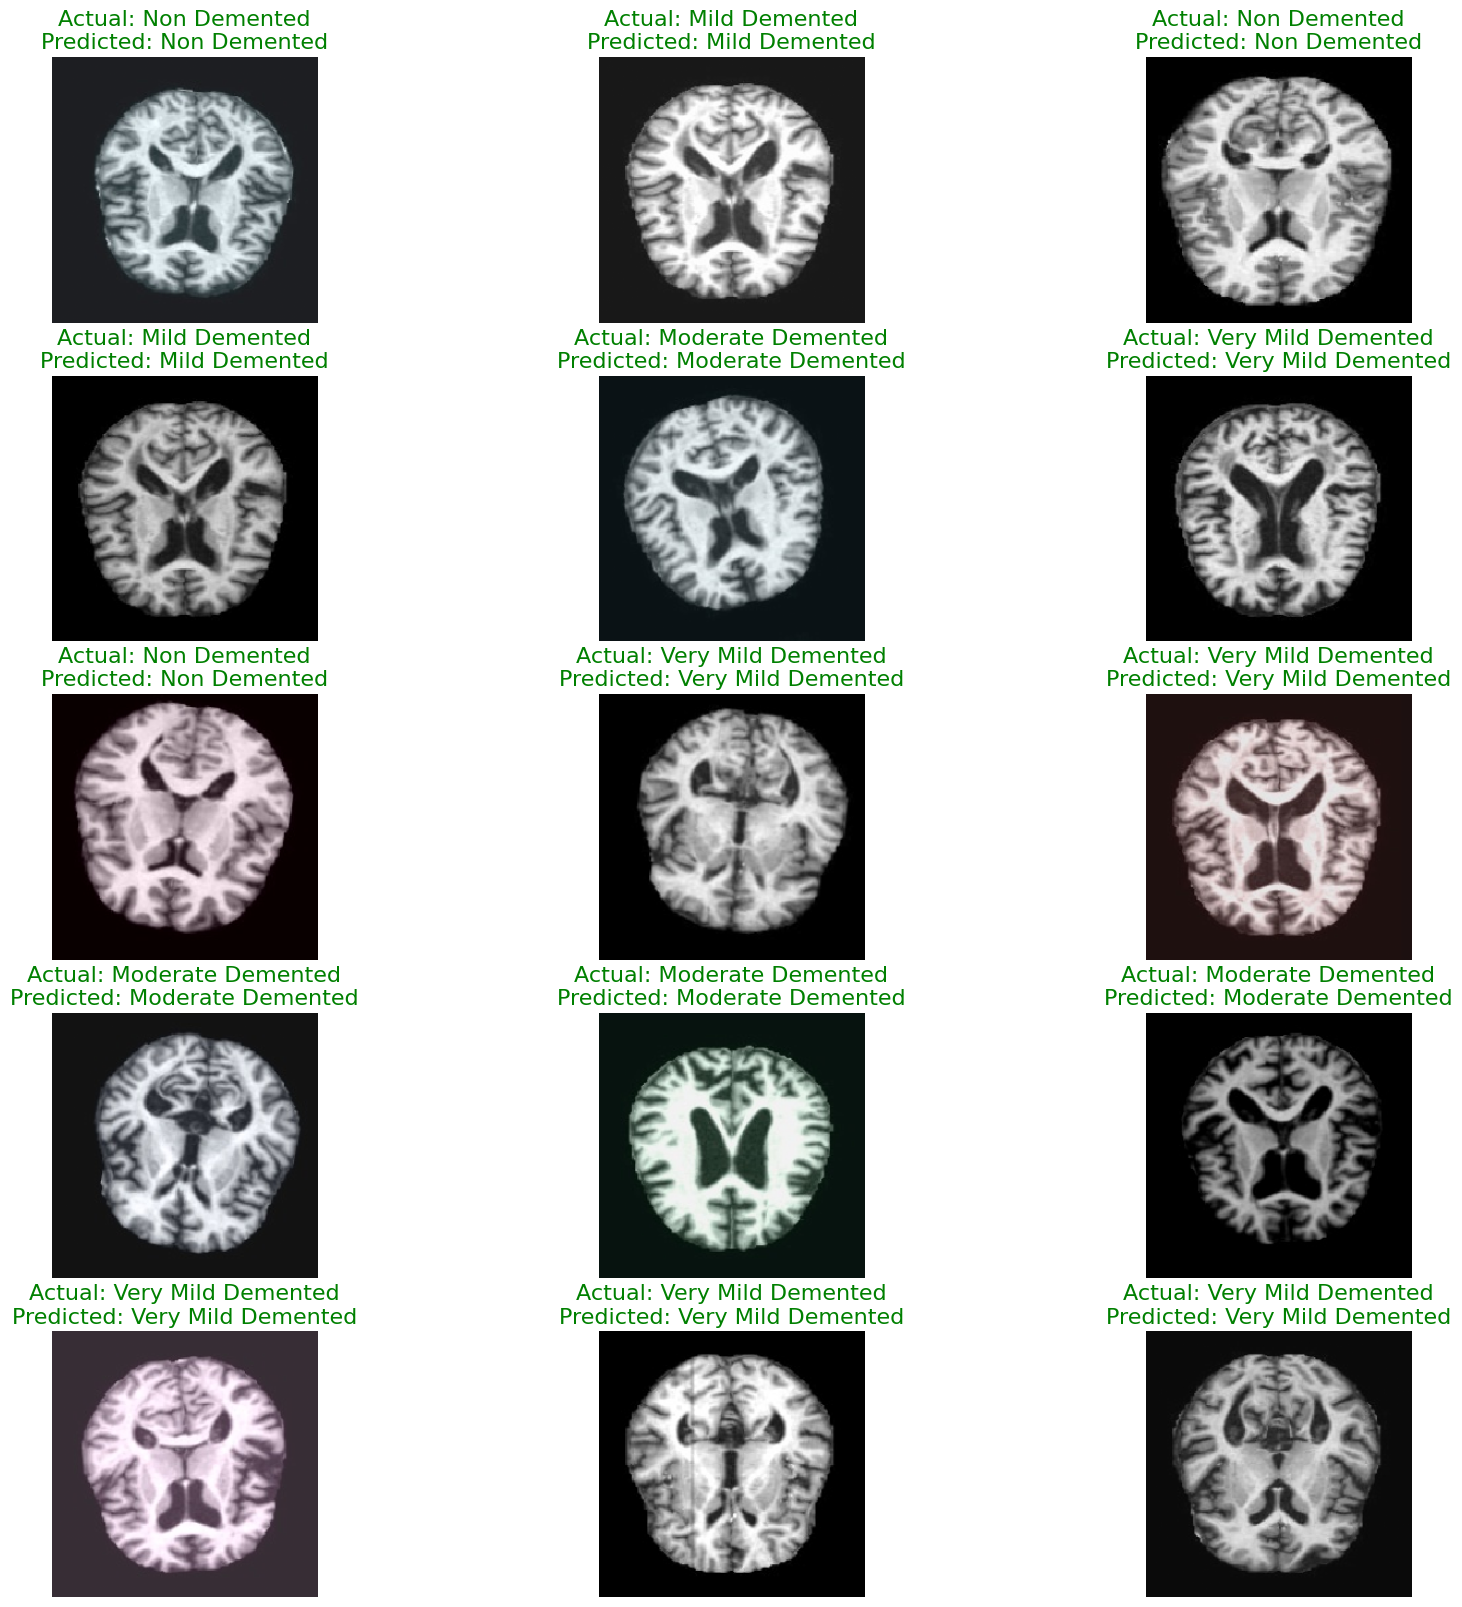

In [ ]:
def display_Predict_images(image):
    # Extract class indices from the test set
    class_dict = test_data_flow.class_indices
    # Get the list of class names
    classes = list(class_dict.keys())
    # Get a batch of images and their labels from the generator
    images, labels = next(image)

    # Set up the plot for displaying images
    plt.figure(figsize=(20, 20))
    length = len(labels)

    # Determine the number of images to display, maximum 10
    num_images = min(15, length)

    # Iterate through the images and display them
    for i in range(num_images):
        plt.subplot(5, 3, i + 1)

        # Scale images between 0 and 1 if needed
        image = (images[i] + 1) / 2

        # Display the image
        plt.imshow(image)

        # Make prediction for the current image
        predicted_label_idx = np.argmax(ModelDiagnostic.predict(np.expand_dims(images[i], axis=0)))
        actual_label_idx = np.argmax(labels[i])

        # Get the class names corresponding to the indices
        predicted_label = classes[predicted_label_idx]
        actual_label = classes[actual_label_idx]

        # Display prediction and actual value in the title
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=16, color="green" if predicted_label == actual_label else "red")
        plt.axis('off')

    # Show the plot with the images
    plt.show()

# Call the function
display_Predict_images(test_data_flow)

# **Second Model**

This model is for Segmentation of the zones affected by Alzheimer

# **Import Data. Second Model**

In [ ]:
Label35_Path = Path("../input/mrihs/label/35label")
Image35_Path = Path("../input/mrihs/original/35")

Label_Path = list(Label35_Path.glob(r"**/*.jpg"))
Image_Path = list(Image35_Path.glob(r"**/*.jpg"))

Label_Series = pd.Series(Label_Path,name="LABEL").astype(str)
Image_Series = pd.Series(Image_Path,name="IMAGE").astype(str)

In [ ]:
L_IMG = []
R_IMG = []

Total_IMG = []

Split_Params_For_LABEL = "35label/"
Split_Params_For_IMG = "35/"

Common_Params = "/"

List_Split_Params = "_"


for label_x,image_x in zip(Label_Series,Image_Series):

    try:

        L_Main_Path,L_Target_Path = label_x.split(Split_Params_For_LABEL)
        I_Main_Path,I_Target_Path = image_x.split(Split_Params_For_IMG)

        Label_Path_Before,Label_Path_Middle,Label_Path_After = L_Target_Path.split(Common_Params)
        IMG_Path_Before,IMG_Path_After = I_Target_Path.split(Common_Params)

        Label_Path_Split = Label_Path_After.split(List_Split_Params)
        IMG_Path_Split = IMG_Path_After.split(List_Split_Params)


        if Label_Path_Split[-2] == "L":

            L_IMG.append(label_x)
            Total_IMG.append(image_x)

        elif Label_Path_Split[-2] == "R":

            Total_IMG.append(image_x)
            R_IMG.append(label_x)

        else:
            print("SOMETHING IS WRONG!")

    except:
        print("LABEL: ",label_x)
        print("IMG: ",image_x)

Sort_L = sorted(L_IMG)
Sort_R = sorted(R_IMG)
Sort_IMG = sorted(Total_IMG)

# **Visualizes data. Second Model**

<function matplotlib.pyplot.show(close=None, block=None)>

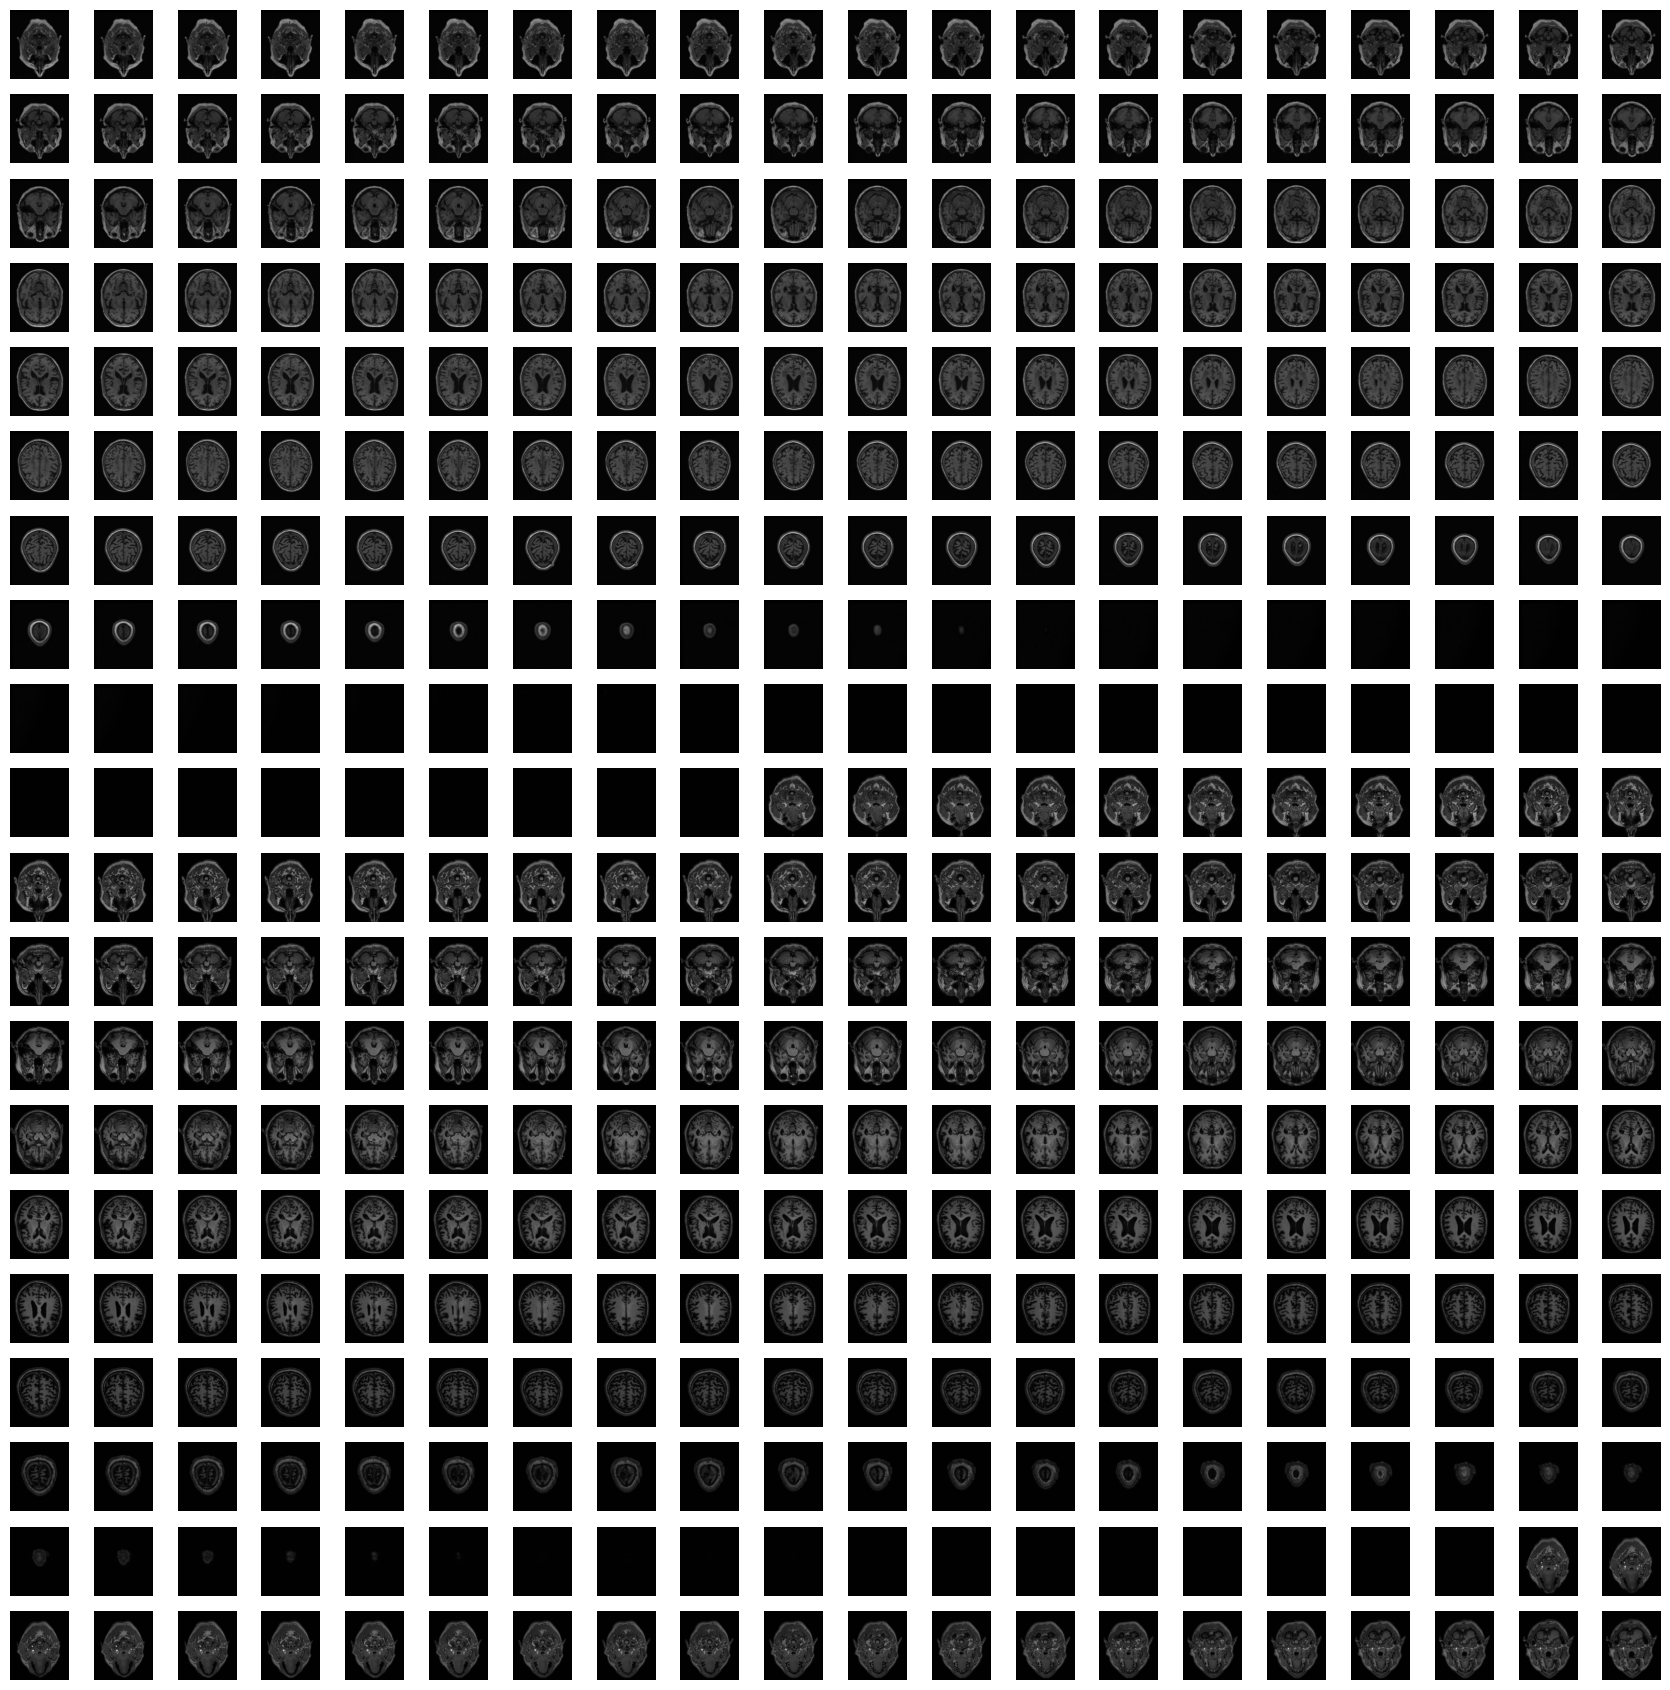

In [ ]:
figure,axis = plt.subplots(20,20,figsize=(17,17))

for indexing,operations in enumerate(axis.flat):

    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[indexing]),cv2.COLOR_BGR2RGB)

    operations.imshow(Example_IMG)
    operations.axis("off")

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

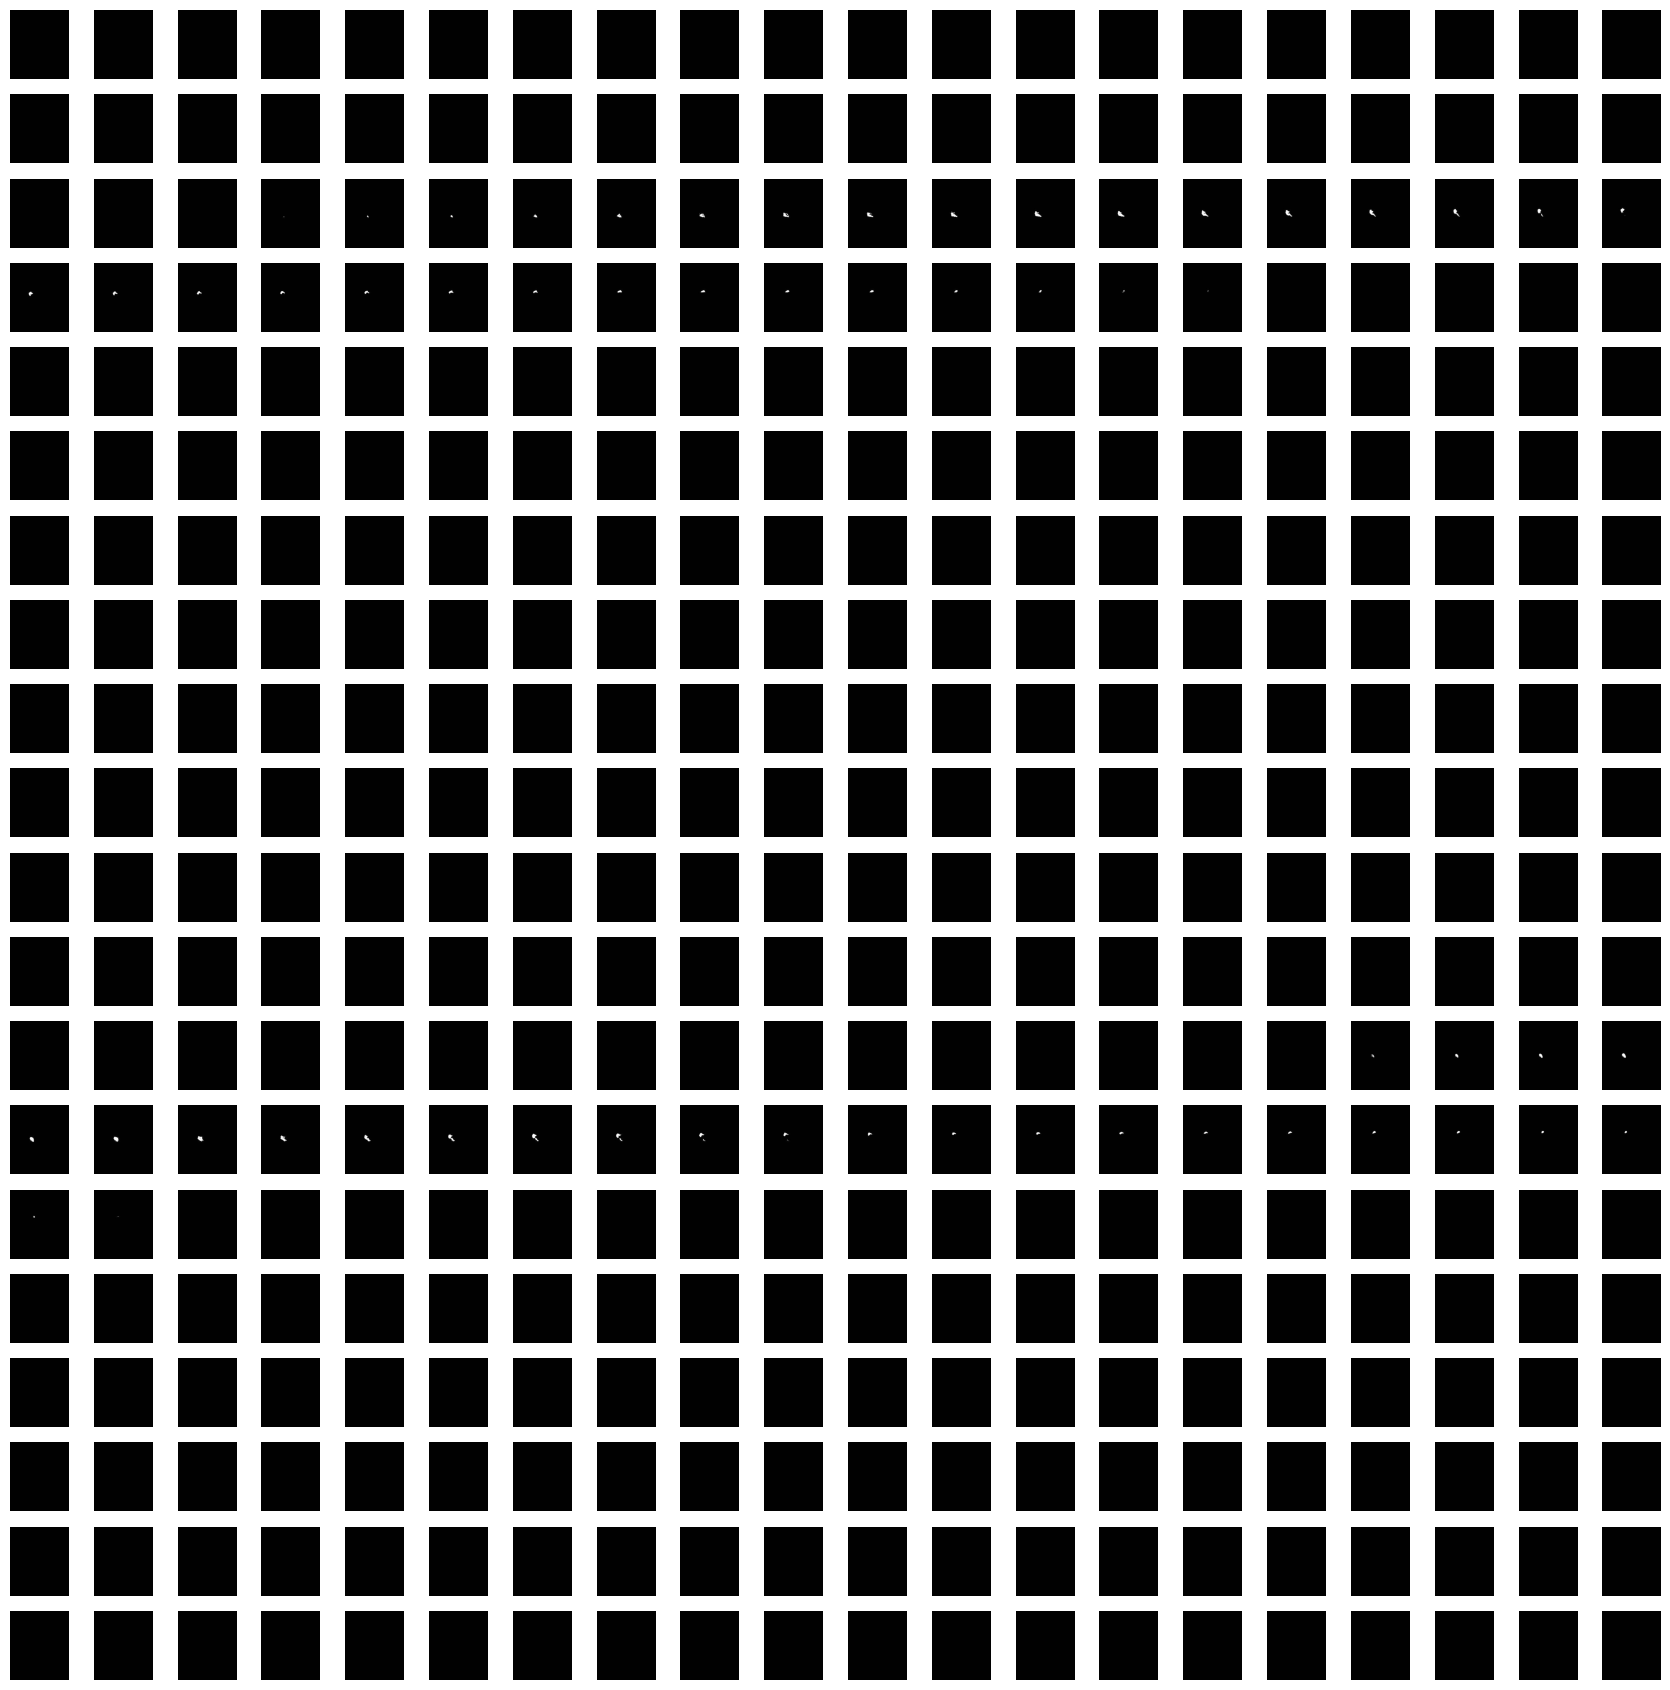

In [ ]:
figure,axis = plt.subplots(20,20,figsize=(17,17))

for indexing,operations in enumerate(axis.flat):

    Example_IMG = cv2.cvtColor(cv2.imread(Sort_L[indexing]),cv2.COLOR_BGR2RGB)

    operations.imshow(Example_IMG)
    operations.axis("off")

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

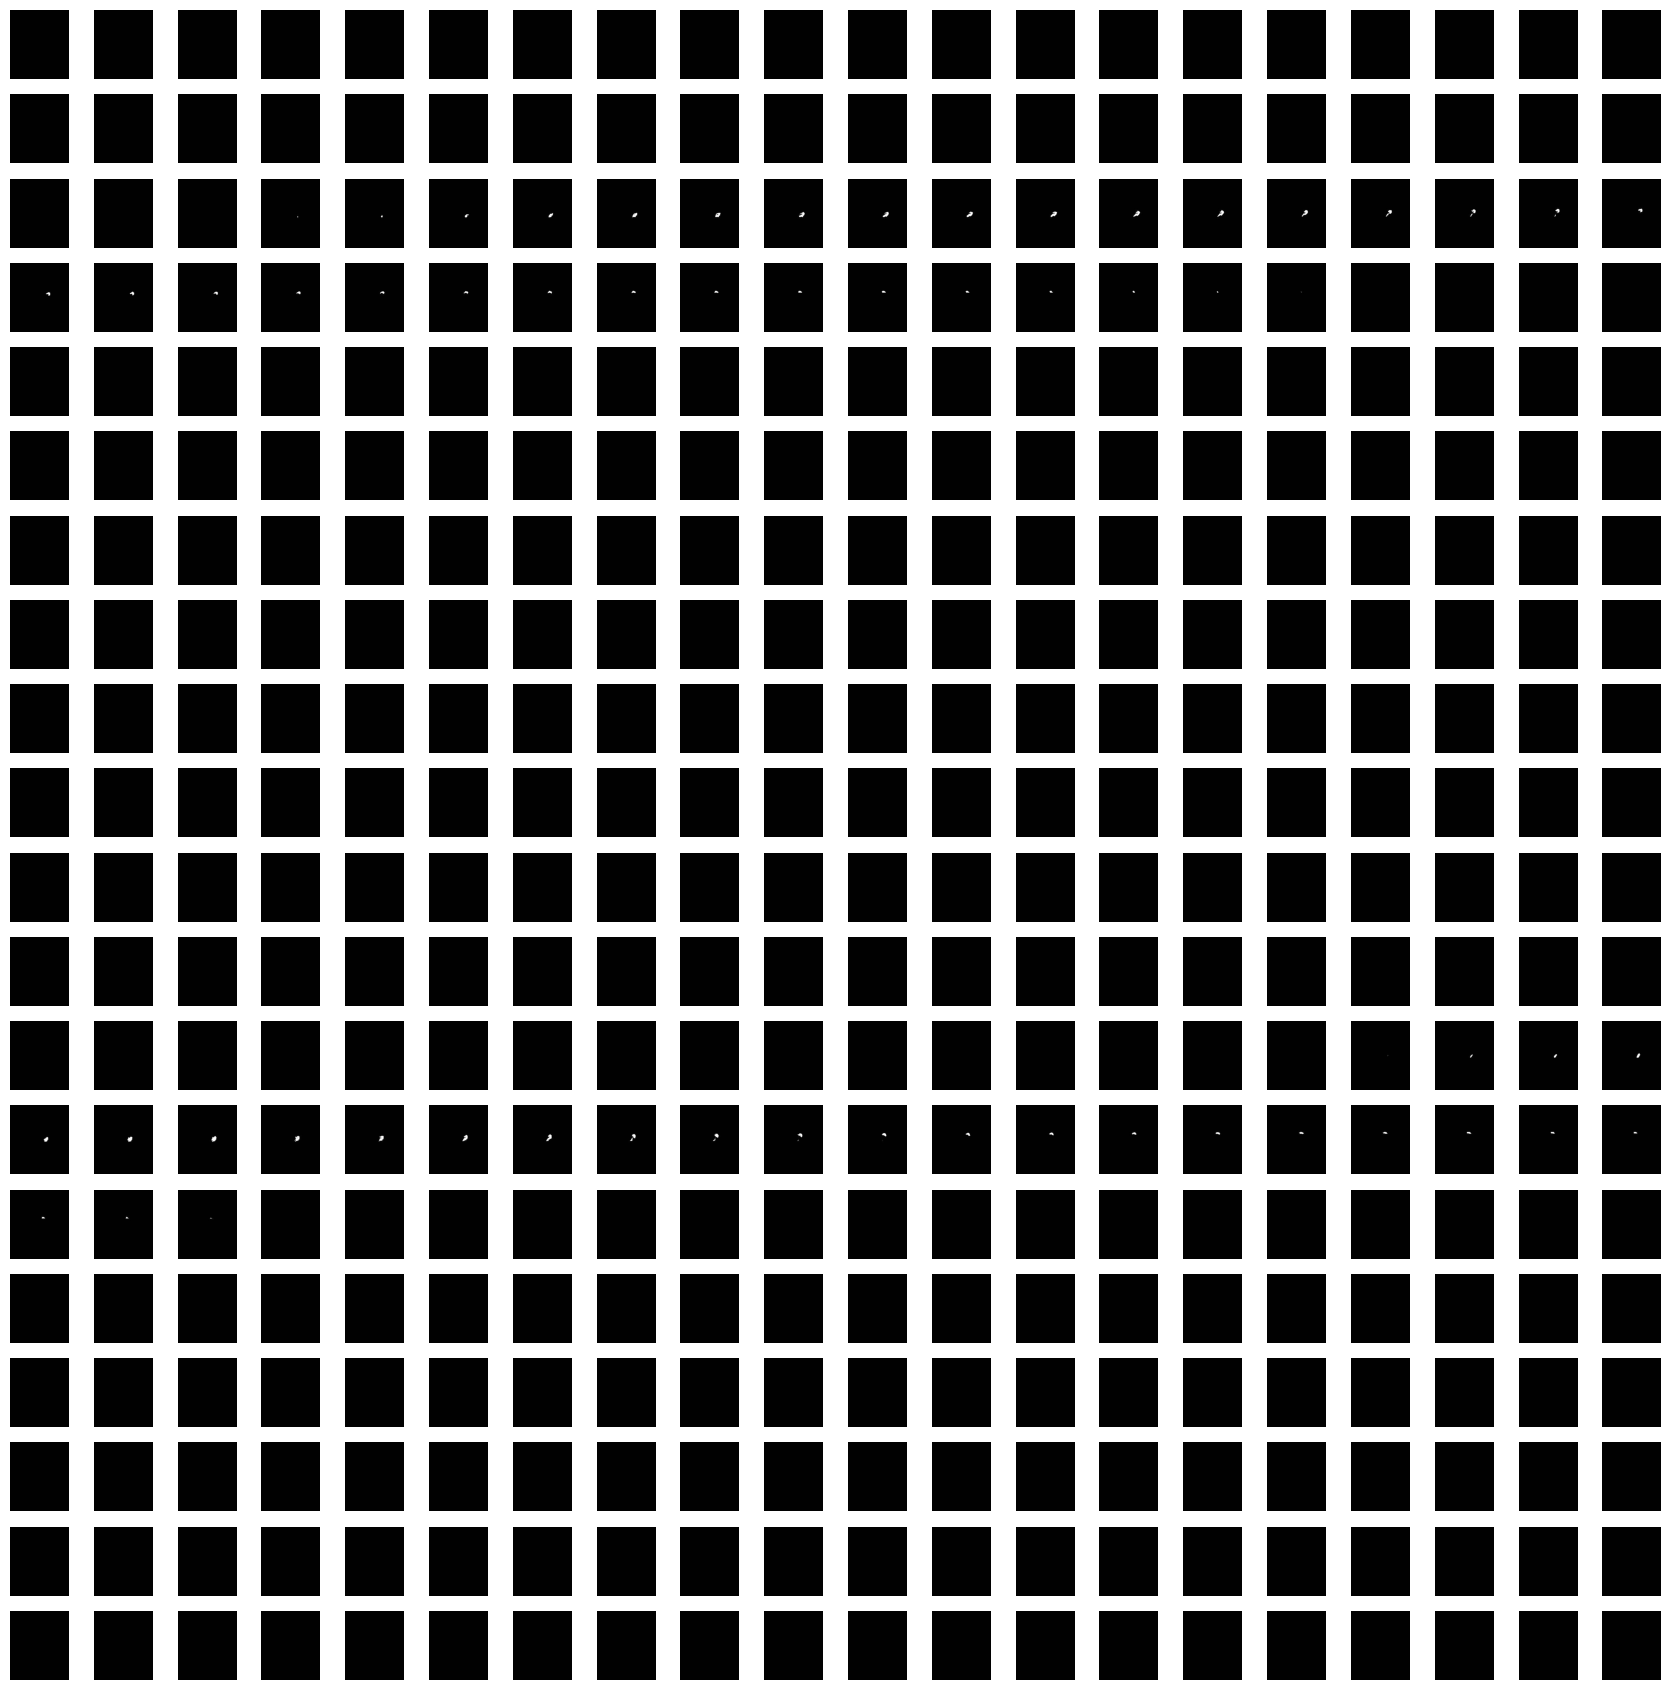

In [ ]:
figure,axis = plt.subplots(20,20,figsize=(17,17))

for indexing,operations in enumerate(axis.flat):

    Example_IMG = cv2.cvtColor(cv2.imread(Sort_R[indexing]),cv2.COLOR_BGR2RGB)

    operations.imshow(Example_IMG)
    operations.axis("off")

plt.tight_layout()
plt.show

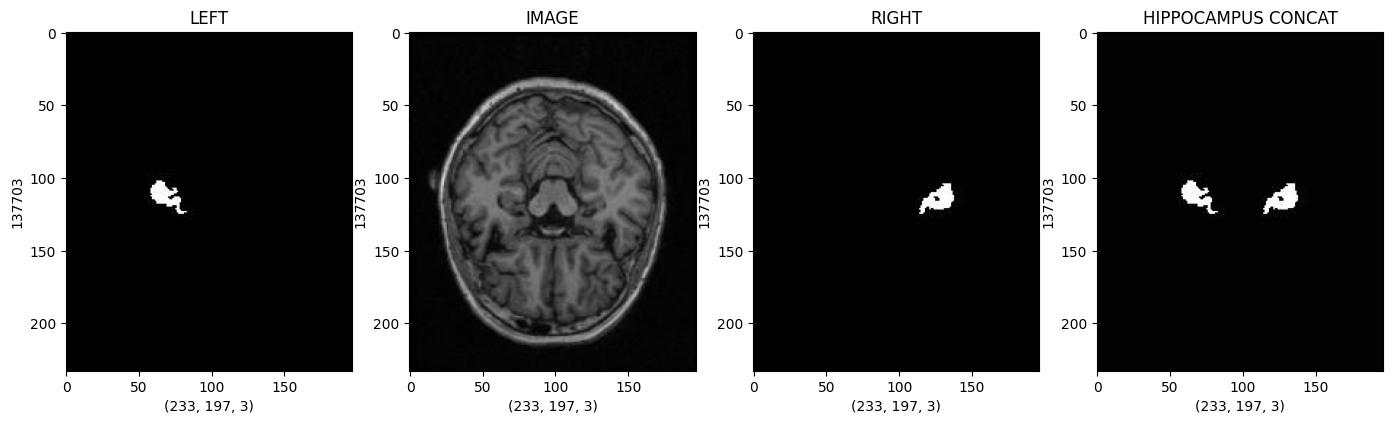

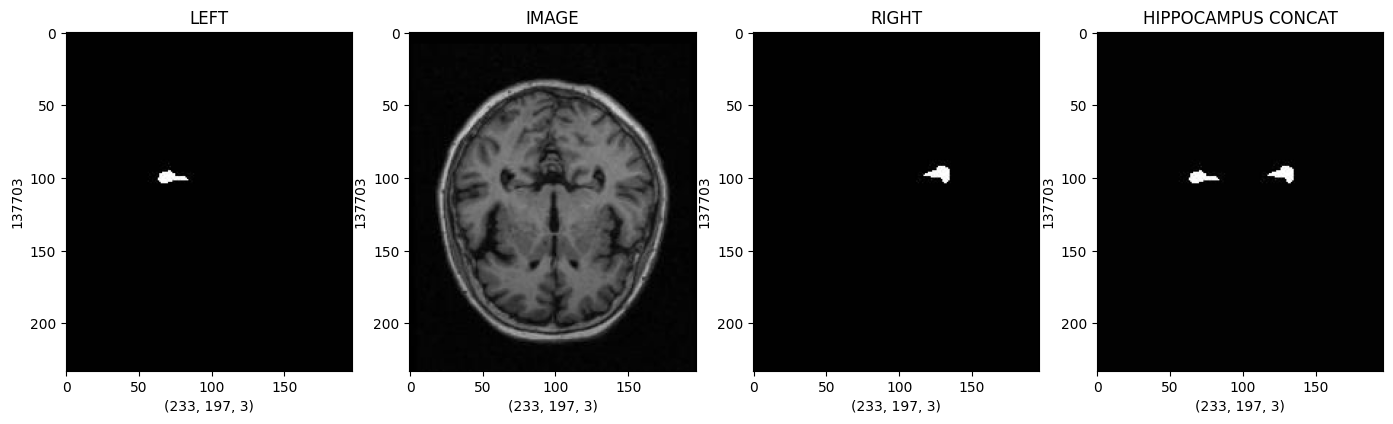

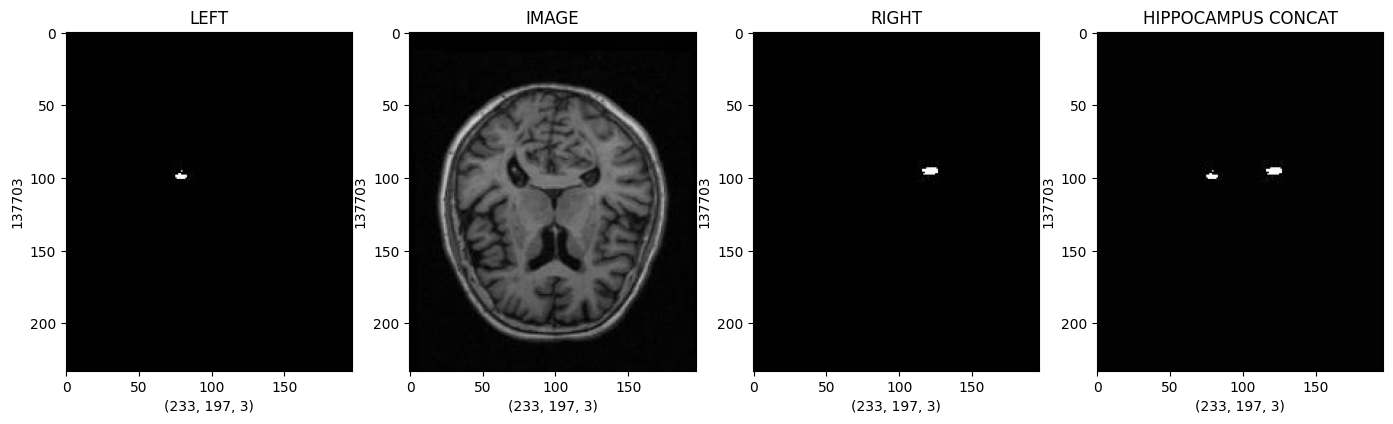

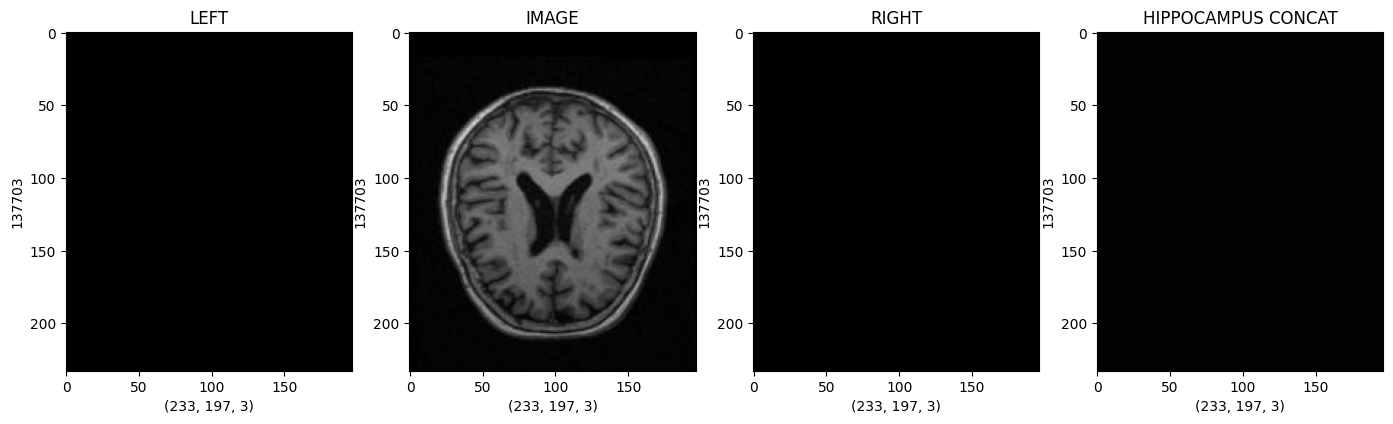

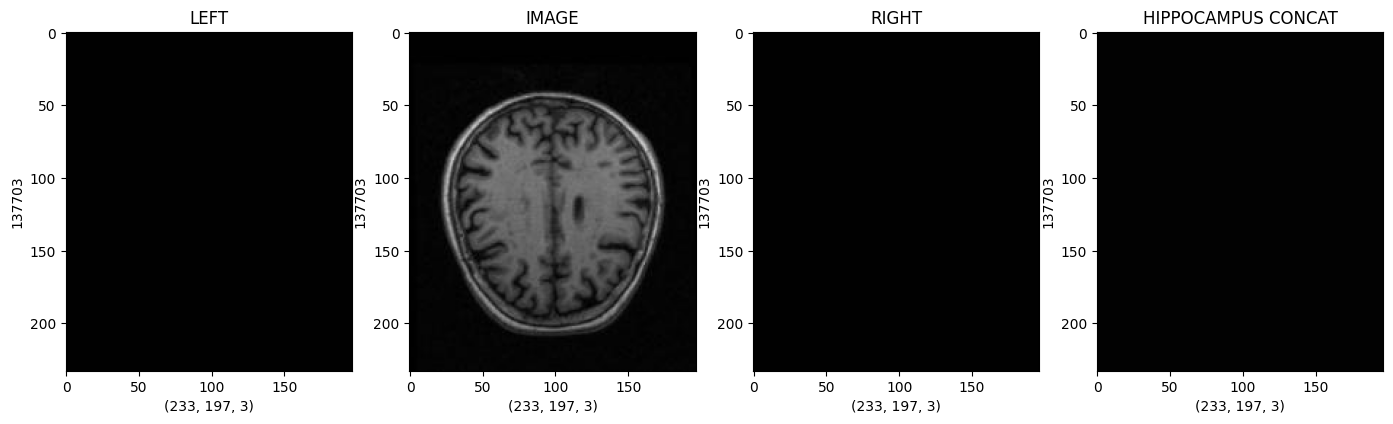

In [ ]:
for NumberFigure in range(5):
    figure,axis = plt.subplots(1,4,figsize=(17,17))
    NumberFigure = 1000 + NumberFigure*10
    Example_L = cv2.cvtColor(cv2.imread(Sort_L[NumberFigure]),cv2.COLOR_BGR2RGB)
    Example_R = cv2.cvtColor(cv2.imread(Sort_R[NumberFigure]),cv2.COLOR_BGR2RGB)
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[NumberFigure]),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

    axis[0].set_xlabel(Example_L.shape)
    axis[0].set_ylabel(Example_L.size)
    axis[0].set_title("LEFT")
    axis[0].imshow(Example_L)

    axis[1].set_xlabel(Example_IMG.shape)
    axis[1].set_ylabel(Example_IMG.size)
    axis[1].set_title("IMAGE")
    axis[1].imshow(Example_IMG)

    axis[2].set_xlabel(Example_R.shape)
    axis[2].set_ylabel(Example_R.size)
    axis[2].set_title("RIGHT")
    axis[2].imshow(Example_R)

    axis[3].set_xlabel(Hıppocampus_Concat.shape)
    axis[3].set_ylabel(Hıppocampus_Concat.size)
    axis[3].set_title("HIPPOCAMPUS CONCAT")
    axis[3].imshow(Hıppocampus_Concat)

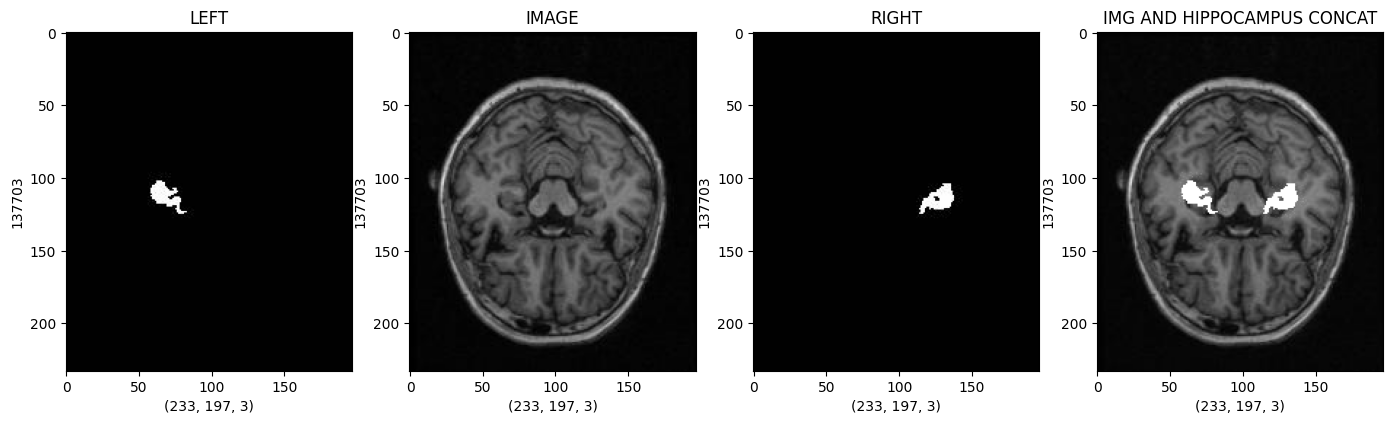

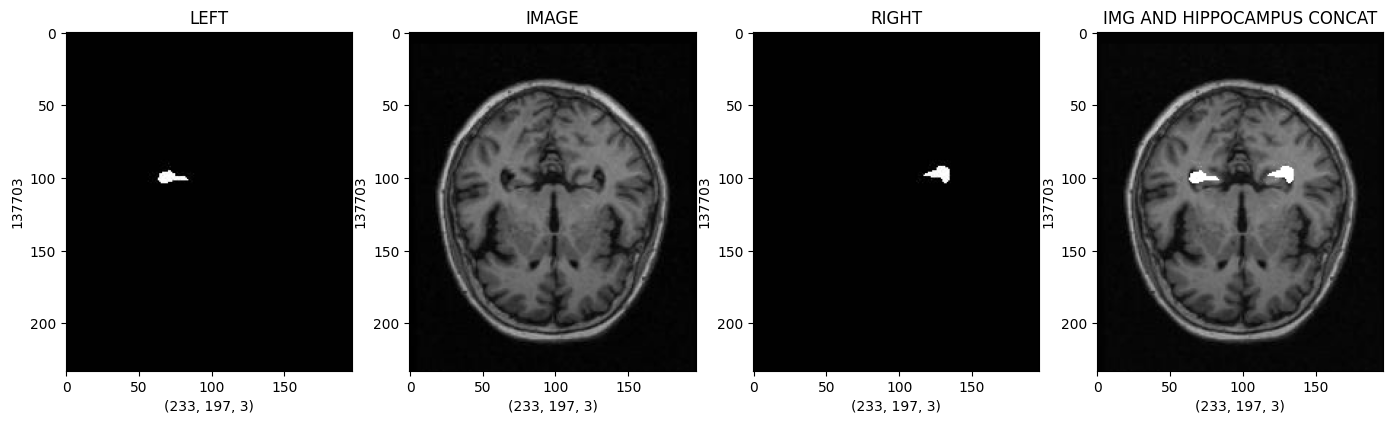

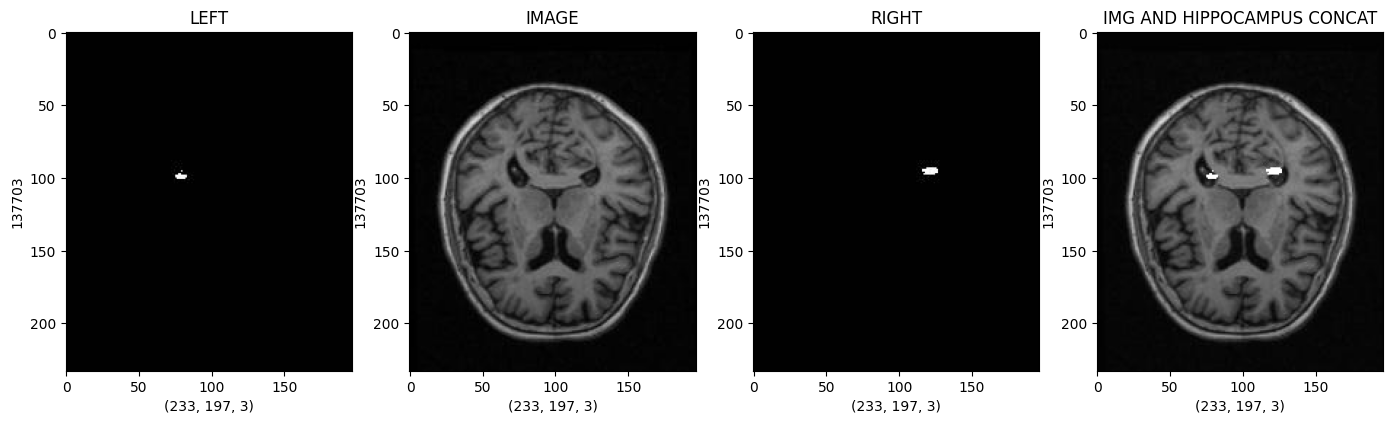

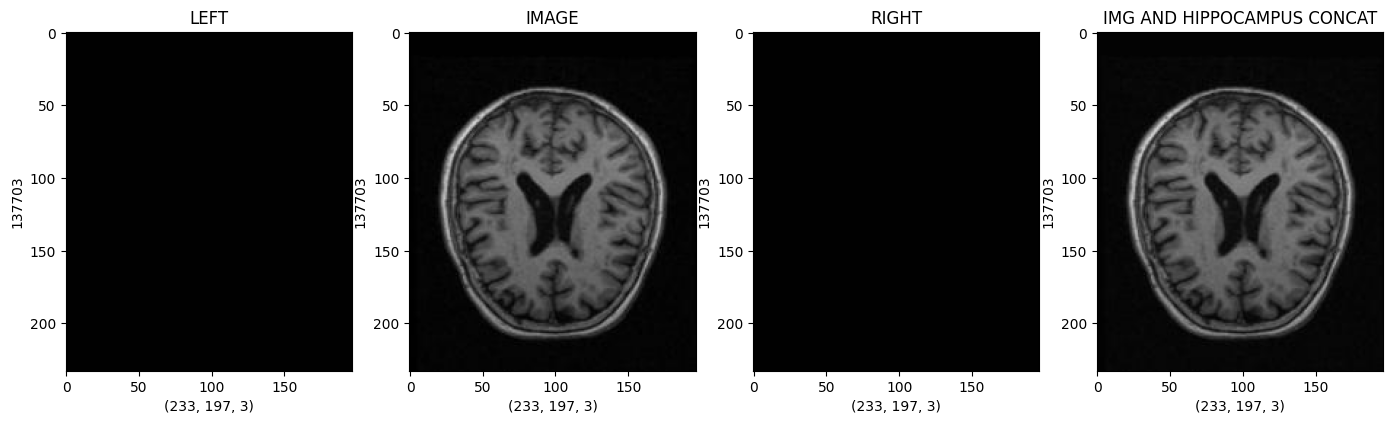

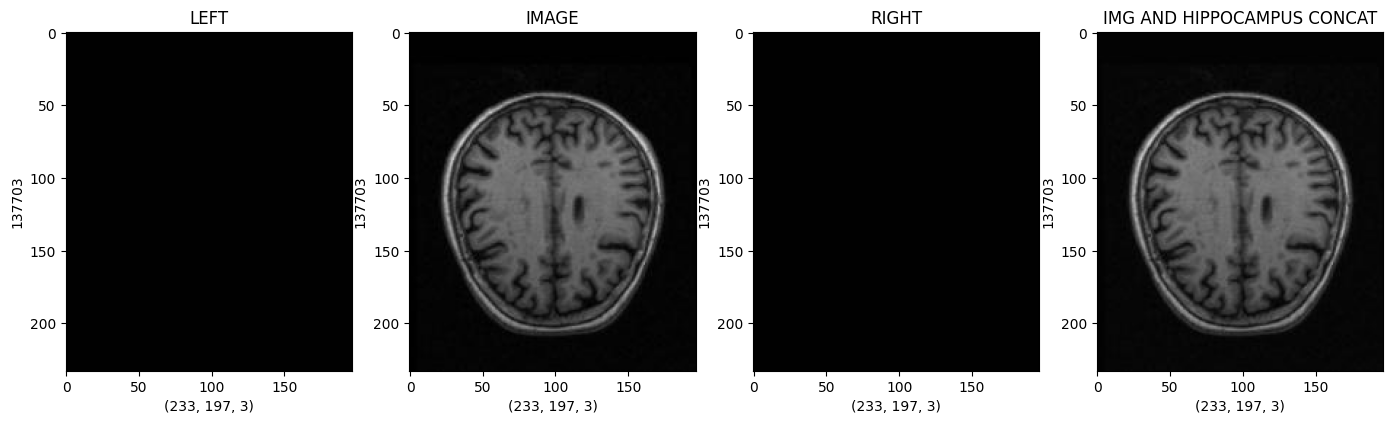

In [ ]:
for NumberFigure in range(5):

    figure,axis = plt.subplots(1,4,figsize=(17,17))
    NumberFigure = 1000 + NumberFigure*10

    Example_L = cv2.cvtColor(cv2.imread(Sort_L[NumberFigure]),cv2.COLOR_BGR2RGB)
    Example_R = cv2.cvtColor(cv2.imread(Sort_R[NumberFigure]),cv2.COLOR_BGR2RGB)
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[NumberFigure]),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

    Main_Concat = cv2.addWeighted(Example_IMG,1,Hıppocampus_Concat,1,0.2)

    axis[0].set_xlabel(Example_L.shape)
    axis[0].set_ylabel(Example_L.size)
    axis[0].set_title("LEFT")
    axis[0].imshow(Example_L)

    axis[1].set_xlabel(Example_IMG.shape)
    axis[1].set_ylabel(Example_IMG.size)
    axis[1].set_title("IMAGE")
    axis[1].imshow(Example_IMG)

    axis[2].set_xlabel(Example_R.shape)
    axis[2].set_ylabel(Example_R.size)
    axis[2].set_title("RIGHT")
    axis[2].imshow(Example_R)

    axis[3].set_xlabel(Main_Concat.shape)
    axis[3].set_ylabel(Main_Concat.size)
    axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
    axis[3].imshow(Main_Concat)

In [ ]:
X_Image = []
X_Hippocampus = []

for x_image,x_l,x_r in zip(Sort_IMG,Sort_L,Sort_R):

    Picking_L = cv2.cvtColor(cv2.imread(x_l),cv2.COLOR_BGR2RGB)
    Picking_R = cv2.cvtColor(cv2.imread(x_r),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.cvtColor(cv2.imread(x_image),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Picking_L,1,Picking_R,1,0.2)


    Picking_IMG = Picking_IMG / 255.
    Hıppocampus_Concat = Hıppocampus_Concat / 255.

    X_Image.append(Picking_IMG)
    X_Hippocampus.append(Hıppocampus_Concat)


In [ ]:
Image_New = []
Hippocampus_Mask = []

for x_image,x_l,x_r in zip(Sort_IMG[:1500],Sort_L[:1500],Sort_R[:1500]):

    Picking_L = cv2.cvtColor(cv2.imread(x_l),cv2.COLOR_BGR2RGB)
    Picking_R = cv2.cvtColor(cv2.imread(x_r),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.cvtColor(cv2.imread(x_image),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Picking_L,1,Picking_R,1,0.2)

    Picking_IMG = Picking_IMG / 255.
    Hıppocampus_Concat = Hıppocampus_Concat / 255.

    Image_New.append(Picking_IMG)
    Hippocampus_Mask.append(Hıppocampus_Concat)

In [ ]:
Image_Array = np.array(X_Image,dtype="float32")
Hippocampus_Array = np.array(X_Hippocampus,dtype="float32")
# Assuming Hippocampus_Array is RGB data, convert it to grayscale
Hippocampus_Gray = np.mean(Hippocampus_Array, axis=3, keepdims=True)

Image_New = np.array(Image_New,dtype="float32")
Hippocampus_Mask = np.array(Hippocampus_Mask,dtype="float32")

# **Create Architecture. Second Model**

In [ ]:
# Creating a Sequential model by stacking layers
ModelSegmentation = Sequential([
    #Encoder
    Conv2D(32,(2,2),kernel_initializer = 'he_normal'),
    BatchNormalization(),
    ReLU(),
    Conv2D(64,(2,2),kernel_initializer = 'he_normal'),
    BatchNormalization(),
    ReLU(),
    Conv2D(128,(2,2),kernel_initializer = 'he_normal'),
    BatchNormalization(),
    ReLU(),

    #Decoder
    Conv2DTranspose(64,(2,2)),
    ReLU(),
    Conv2DTranspose(32,(2,2)),
    ReLU(),
    Conv2DTranspose(1,(2,2)),
    ReLU()
])

In [ ]:
ModelSegmentation.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.000001),metrics=["mse"])

# **Training. Second Model**

In [ ]:
# Training the model
ModelSegmentation.fit(Image_Array[:3000], Hippocampus_Gray[:3000], epochs=25)

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 90s 603ms/step - loss: 1.5858 - mse: 0.3244
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 334ms/step - loss: 1.3343 - mse: 0.2640
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 336ms/step - loss: 1.1303 - mse: 0.2162
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 334ms/step - loss: 0.9594 - mse: 0.1772
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 335ms/step - loss: 0.8296 - mse: 0.1477
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - loss: 0.7242 - mse: 0.1241
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - loss: 0.6388 - mse: 0.1061
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 334ms/step - loss: 0.5660 - mse: 0.0913
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - loss: 0.4987 - mse: 0.0768
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 335ms/step - loss: 0.4481 - mse: 0.0669
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - loss: 0.4060 - mse: 0.0580
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 336ms/step - loss: 0.3662 - mse: 0.0501
Epoch 13/25
9

# **Results. First Model**

# **Prediction. First Model**